In [1]:
import json, sys
import numpy as np
import matplotlib.pyplot as plt

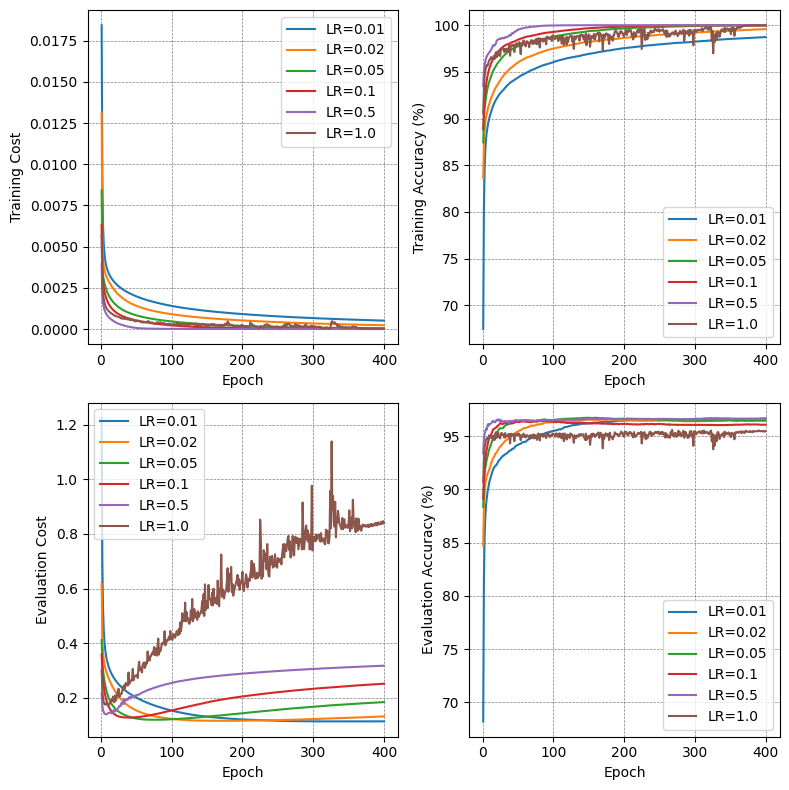

In [2]:
# Read the solution from the text file
resultsFile = './data/noreg_varlr_hl30n_test.txt'
solution = []
with open(resultsFile, 'r') as f:
    i = 0
    lines = f.readlines()
    while i < len(lines):
        s = {}
        while lines[i] != '\n':
            key = lines[i].strip()
            value = list(map(float, lines[i+1].strip().split(';')))
            s[key] = value
            i += 2
        solution.append(s)
        i += 1

learning_rate = [0.01, 0.02, 0.05, 0.1, 0.5, 1.0]

# Plot the cost and accuracy
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
## Training cost
for i, lr in enumerate(learning_rate):
    axs[0,0].plot(solution[i]["epochs"], solution[i]["training_cost"], '-',label=f'LR={lr}')
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Training Cost')
axs[0,0].legend()
axs[0,0].grid(color='gray', linestyle='--', linewidth=0.5)
## Training accuracy
for i, lr in enumerate(learning_rate):
    axs[0,1].plot(solution[i]["epochs"], solution[i]["training_accuracy"], '-',label=f'LR={lr}')
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('Training Accuracy (%)')
axs[0,1].legend()
axs[0,1].grid(color='gray', linestyle='--', linewidth=0.5)
## Evaluation cost
for i, lr in enumerate(learning_rate):
    axs[1,0].plot(solution[i]["epochs"], solution[i]["evaluation_cost"], '-',label=f'LR={lr}')
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Evaluation Cost')
axs[1,0].legend()
axs[1,0].grid(color='gray', linestyle='--', linewidth=0.5)
## Evaluation accuracy
for i, lr in enumerate(learning_rate):
    axs[1,1].plot(solution[i]["epochs"], solution[i]["evaluation_accuracy"], '-',label=f'LR={lr}')
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('Evaluation Accuracy (%)')
axs[1,1].legend()
axs[1,1].grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
#### Loading a Network
def load(filename):
    """Load a neural network from the file ``filename``.  Returns an
    instance of Network.

    """
    f = open(filename, "r")
    data = json.load(f)
    f.close()
    cost = getattr(sys.modules[__name__], data["cost"])
    net = NaiveNetwork(data["sizes"], cost=cost)
    net.weights = [np.array(w) for w in data["weights"]]
    net.biases = [np.array(b) for b in data["biases"]]
    return net